In [108]:
import re
import pandas as pd

In [143]:
data=f.read()

In [173]:
tem=open('Santacruz_Library_chat.txt',encoding='utf-8')
 

In [175]:
temp = tem.read()

In [176]:
temp

'01/02/22, 9:09 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n27/03/21, 8:55 am - +91 91368 04010 created group "Santacruz West Library📚"\n01/02/22, 9:09 pm - +91 97699 28872 added you\n02/02/22, 3:58 pm - +91 97699 28872: Guys plz out time aj updated chahiye jisne kal nahi likha tha\n02/02/22, 3:59 pm - Amit: This message was deleted\n04/02/22, 11:01 am - +91 97699 28872: Library main koon koon\n04/02/22, 11:01 am - +91 97699 28872: Hai\n04/02/22, 11:01 am - Vinay Yadav: Present\n04/02/22, 11:02 am - +91 97699 28872: Bhai ek student ayega\n04/02/22, 11:02 am - +91 90761 85764: absent\n04/02/22, 11:02 am - +91 97699 28872: Likh ke lena\n04/02/22, 11:02 am - Vinay Yadav: Ok👍\n04/02/22, 11:02 am - +91 97699 28872: Check kar pehele se uska nam hoga wapas mat likhna just check\n04/02/22, 2:31 pm - Abhishek: Koi aake open kardo gate\n04/02/22, 11:31 pm - +91 97699 28872: Guys sat sun yoga nah

In [167]:
df=temp.read()

In [208]:
t=temp[:20]
t

'01/02/22, 9:09 pm - '

In [209]:
t.find("pm")==-1 or t.find("am") ==-1

True

In [169]:
print(df)

In [114]:
pattern_pm='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\spm\s-\s'

In [115]:
pattern_am='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\sam\s-\s'

In [116]:
#pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
#messages=resplit(pattern,data)[1:]
#len(messages)
#dates=re.findall(pattern,data)
#df=pd.DataFrame({'user_message':messages,'message_date':dates})

In [117]:
messages_pm=re.split(pattern_pm,df)[1:]

In [118]:
messages_am=re.split(pattern_am,df)[1:]

In [119]:
len(messages_pm)


1154

In [120]:
dates_pm=re.findall(pattern_pm,df)
dates_am=re.findall(pattern_am,df)

In [121]:
len(messages_am)

288

In [122]:
len(dates_pm)

1154

In [123]:
df_pm=pd.DataFrame({'user_message':messages_pm,'message_date':dates_pm})

df_am=pd.DataFrame({'user_message':messages_am,'message_date':dates_am})

In [124]:
df=df_am.append(df_pm,ignore_index=True)

C:\Users\RAMESH~1\AppData\Local\Temp/ipykernel_9876/2099244444.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_am.append(df_pm,ignore_index=True)


In [125]:
df

,user_message,message_date
0,"+91 91368 04010 created group ""Santacruz West ...","27/03/21, 8:55 am -"
1,+91 97699 28872: Library main koon koon\n,"04/02/22, 11:01 am -"
2,+91 97699 28872: Hai\n,"04/02/22, 11:01 am -"
3,Vinay Yadav: Present\n,"04/02/22, 11:01 am -"
4,+91 97699 28872: Bhai ek student ayega\n,"04/02/22, 11:02 am -"
...,...,...
1437,+91 97699 28872: @918286568999 plz check data ...,"08/07/22, 4:20 pm -"
1438,+91 97699 28872: I hope all students has fille...,"08/07/22, 4:20 pm -"
1439,+91 97699 28872: ❓❓❓❓❓\n,"08/07/22, 4:20 pm -"
1440,+91 70211 04637: Open the door\n,"12/07/22, 1:55 pm -"


In [126]:
df['message_date']=df['message_date'].apply(lambda x: x[:-3])

In [127]:
df['message_date']=pd.to_datetime(df['message_date'],infer_datetime_format=True)

In [128]:
#df['message_date']=pd.to_datetime(df['message_date']).strftime('%H:%M:%S')

In [129]:
df

,user_message,message_date
0,"+91 91368 04010 created group ""Santacruz West ...",2021-03-27 08:55:00
1,+91 97699 28872: Library main koon koon\n,2022-04-02 11:01:00
2,+91 97699 28872: Hai\n,2022-04-02 11:01:00
3,Vinay Yadav: Present\n,2022-04-02 11:01:00
4,+91 97699 28872: Bhai ek student ayega\n,2022-04-02 11:02:00
...,...,...
1437,+91 97699 28872: @918286568999 plz check data ...,2022-08-07 16:20:00
1438,+91 97699 28872: I hope all students has fille...,2022-08-07 16:20:00
1439,+91 97699 28872: ❓❓❓❓❓\n,2022-08-07 16:20:00
1440,+91 70211 04637: Open the door\n,2022-12-07 13:55:00


In [130]:

#df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M - ')

In [131]:
df.rename(columns={'message_date':'date'},inplace=True)

In [132]:
df

,user_message,date
0,"+91 91368 04010 created group ""Santacruz West ...",2021-03-27 08:55:00
1,+91 97699 28872: Library main koon koon\n,2022-04-02 11:01:00
2,+91 97699 28872: Hai\n,2022-04-02 11:01:00
3,Vinay Yadav: Present\n,2022-04-02 11:01:00
4,+91 97699 28872: Bhai ek student ayega\n,2022-04-02 11:02:00
...,...,...
1437,+91 97699 28872: @918286568999 plz check data ...,2022-08-07 16:20:00
1438,+91 97699 28872: I hope all students has fille...,2022-08-07 16:20:00
1439,+91 97699 28872: ❓❓❓❓❓\n,2022-08-07 16:20:00
1440,+91 70211 04637: Open the door\n,2022-12-07 13:55:00


In [133]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user']=users
df['messages']=messages
df.drop(columns=['user_message'],inplace=True)

df.head()
        

,date,user,messages
0,2021-03-27 08:55:00,"+91 91368 04010 created group ""Santacruz West ...",
1,2022-04-02 11:01:00,+91 97699 28872,Library main koon koon\n
2,2022-04-02 11:01:00,+91 97699 28872,Hai\n
3,2022-04-02 11:01:00,Vinay Yadav,Present\n
4,2022-04-02 11:02:00,+91 97699 28872,Bhai ek student ayega\n


In [134]:
df['year']=df['date'].dt.year

In [135]:
df

,date,user,messages,year
0,2021-03-27 08:55:00,"+91 91368 04010 created group ""Santacruz West ...",,2021
1,2022-04-02 11:01:00,+91 97699 28872,Library main koon koon\n,2022
2,2022-04-02 11:01:00,+91 97699 28872,Hai\n,2022
3,2022-04-02 11:01:00,Vinay Yadav,Present\n,2022
4,2022-04-02 11:02:00,+91 97699 28872,Bhai ek student ayega\n,2022
...,...,...,...,...
1437,2022-08-07 16:20:00,+91 97699 28872,@918286568999 plz check data again so that I c...,2022
1438,2022-08-07 16:20:00,+91 97699 28872,I hope all students has filled up the form\n,2022
1439,2022-08-07 16:20:00,+91 97699 28872,❓❓❓❓❓\n,2022
1440,2022-12-07 13:55:00,+91 70211 04637,Open the door\n,2022


In [136]:
df['month']=df['date'].dt.month_name()

In [137]:
df['day']=df['date'].dt.day

In [138]:
df['hour']=df['date'].dt.hour

In [139]:
df['minute']=df['date'].dt.minute

In [140]:
df

,date,user,messages,year,month,day,hour,minute
0,2021-03-27 08:55:00,"+91 91368 04010 created group ""Santacruz West ...",,2021,March,27,8,55
1,2022-04-02 11:01:00,+91 97699 28872,Library main koon koon\n,2022,April,2,11,1
2,2022-04-02 11:01:00,+91 97699 28872,Hai\n,2022,April,2,11,1
3,2022-04-02 11:01:00,Vinay Yadav,Present\n,2022,April,2,11,1
4,2022-04-02 11:02:00,+91 97699 28872,Bhai ek student ayega\n,2022,April,2,11,2
...,...,...,...,...,...,...,...,...
1437,2022-08-07 16:20:00,+91 97699 28872,@918286568999 plz check data again so that I c...,2022,August,7,16,20
1438,2022-08-07 16:20:00,+91 97699 28872,I hope all students has filled up the form\n,2022,August,7,16,20
1439,2022-08-07 16:20:00,+91 97699 28872,❓❓❓❓❓\n,2022,August,7,16,20
1440,2022-12-07 13:55:00,+91 70211 04637,Open the door\n,2022,December,7,13,55


In [141]:
len(words)

NameError: name 'words' is not defined

In [142]:
from collections import Counter

temp=df]

In [39]:
temp=df[df['user']!='group_notification	']
temp=temp[temp['messages']!= '<Media omitted>\n']

In [40]:
f=open('stop_hinglish.txt','r')

In [41]:
stop_words=f.read()

In [42]:
words=[]
for message in temp['messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [43]:
words

['messages',
 'calls',
 'end-to-end',
 'encrypted.',
 'chat,',
 'whatsapp,',
 'listen',
 'them.',
 'tap',
 'learn',
 'more.',
 '+91',
 '88508',
 '60982',
 'created',
 'group',
 '"dgr',
 'unofficial',
 'fybsc',
 'cs"',
 'joined',
 "group's",
 'invite',
 'link',
 'cuz',
 'stats',
 'mam',
 'fix',
 'discrete',
 'mathematics',
 'book',
 'pdf',
 'mila',
 'kisiko',
 '??',
 'change',
 'colors',
 'anytime',
 '1st',
 'lec*',
 '😂🤘🏻',
 '😂',
 '😂',
 'received',
 '*discrete',
 'mathematics',
 'classroom*',
 'link',
 '+91',
 '99301',
 '52259',
 'joined',
 "group's",
 'invite',
 'link',
 '🙋🏽\u200d♂️',
 'anurag',
 'patil.vcf',
 '(file',
 'attached)',
 'classrooms',
 'aahet',
 'na?',
 'link',
 'discrete',
 'maths',
 'classroom',
 'mam',
 'share',
 'guess',
 '4?',
 'yes.',
 'joining',
 'link',
 'but,',
 'letting',
 '!',
 'message',
 'deleted',
 'yes,',
 'classrooms.',
 'but,',
 '!',
 'cod,',
 'foss,dms',
 'statistics',
 'sorryy',
 'joined',
 'sample',
 'quiz',
 'attach',
 'krke',
 'send',
 'krnaa',
 'kya?

In [44]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,788
1,deleted,736
2,😂,614
3,link,602
4,lec,488
5,✅,442
6,😂😂,407
7,lecture,377
8,ma'am,334
9,mam,312


In [45]:
df['month_num']=df['date'].dt.month

In [50]:
timeline=df.groupby(['year','month_num','month']).count()['messages'].reset_index()

In [51]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [52]:
timeline['time']=time

In [53]:
timeline

,year,month_num,month,messages,time
0,2020,9,September,3712,September-2020
1,2020,10,October,2569,October-2020
2,2020,11,November,2631,November-2020
3,2020,12,December,3544,December-2020
4,2021,1,January,1024,January-2021
5,2021,2,February,633,February-2021
6,2021,3,March,406,March-2021
7,2021,4,April,3883,April-2021
8,2021,5,May,1648,May-2021
9,2021,6,June,1647,June-2021


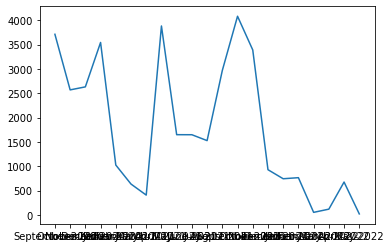

In [56]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['messages'])

In [57]:
df['day_name']=df['date'].dt.day_name()

In [58]:
df['day_name']

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
36954      Sunday
36955    Saturday
36956    Saturday
36957     Tuesday
36958     Tuesday
Name: day_name, Length: 36959, dtype: object

In [59]:

period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

df['period']=period

In [63]:
import seaborn as sns

In [70]:
df.head(1)

,date,user,messages,year,month,day,hour,minute,month_num,day_name,period
0,2020-09-08 14:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020,September,8,14,1,9,Tuesday,14-15


In [73]:
plt.figure(figsize = (20 , 6)) 
sns.heatmap(df.ivot_table(index='day_name',columns='period',values='messages',aggfunc='count').fillna(0)
plt.yticks(rotaiton = 'horizontal')            
plt.show()            

SyntaxError: invalid syntax (Temp/ipykernel_16300/897880464.py, line 3)

<AxesSubplot:xlabel='period', ylabel='day_name'>

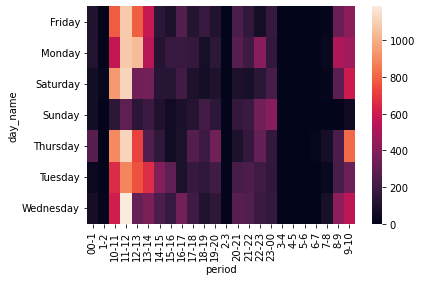

In [76]:
 df.pivot_table(index='day_name',columns='period',values='messages',aggfunc='count').fillna(0))